In [67]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
sales_table = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

Задание 1

На основании датасета для каждого покупателя получите:

предпочитаемый метод оплаты;
общие траты;
количество денег, потраченных на дополнительные услуги и аксессуары.

Пройдемся по датасету и соберем новый с суммой данных по каждому получателю. Траты будем считать только осуществленные, т.е. не будем учитывать "Cancelled" операции.

In [69]:
#находим предпочитаемый метод оплаты
def payment_fav(series) -> str:
    return series.mode()

#создаем таблицу с искомыми данными совершенных заказов
users_table = sales_table[sales_table['Order Status'] != 'Cancelled'].groupby('Customer ID').agg({
    'Total Price': 'sum',
    'Add-on Total': 'sum',
    'Payment Method': payment_fav
})
users_table.head()

,Total Price,Add-on Total,Payment Method
Customer ID,,,
1000,741.09,26.09,Paypal
1002,5020.60,60.16,"[Cash, Credit Card]"
1003,41.50,35.56,Cash
1004,83.00,65.78,Credit Card
1005,11779.11,75.33,"[Debit Card, Paypal]"


На всякий случай, приложу вариант с обработкой заказов с любыми статусами:

In [70]:
#находим предпочитаемый метод оплаты
def payment_fav(series) -> str:
    return series.mode()

#создаем таблицу с искомыми данными любых закасов
users_table = sales_table.groupby('Customer ID').agg({
    'Total Price': 'sum',
    'Add-on Total': 'sum',
    'Payment Method': payment_fav
})
users_table.head()

,Total Price,Add-on Total,Payment Method
Customer ID,,,
1000,6279.42,66.30,"[Credit Card, Paypal]"
1002,5020.60,60.16,"[Cash, Credit Card]"
1003,41.50,35.56,Cash
1004,83.00,65.78,Credit Card
1005,11779.11,75.33,"[Debit Card, Paypal]"



Задание 2

1. На основании датасета получите доход:

по каждому методу доставки,
по каждому типу продукта,
по дополнительным услугам за каждый месяц,
по дополнительным услугам за каждый квартал.


2. Отобразите полученные данные на графике.

Решение:
-создадим таблицы с искомыми данными и выведем графики с помощью matholib

-учитывать будем только совершенные операции (без Canselled) т.к. они доход не приносят

In [71]:
#очистим таблицу от Canslled заказов
sales_table = sales_table.drop(sales_table[sales_table['Order Status'] == "Cancelled"].index)

In [72]:
income_table_ship = sales_table.groupby('Shipping Type').agg({
    'Total Price': 'sum',
})
income_table_ship.head()


,Total Price
Shipping Type,
Expedited,8430385.58
Express,5632093.35
Overnight,5887722.52
Same Day,8292376.50
Standard,14387037.62


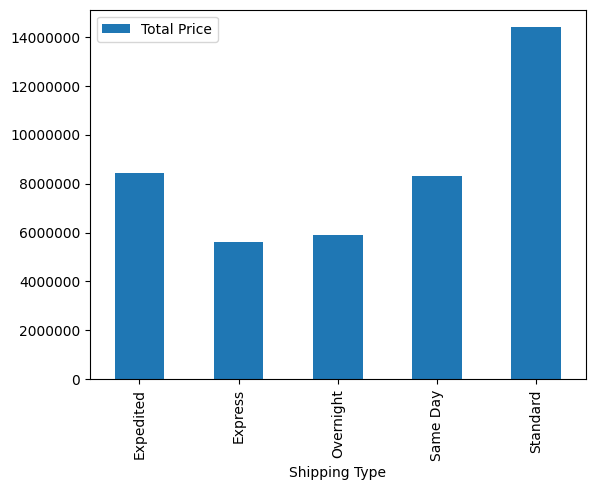

In [73]:

income_table_ship.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [74]:
income_table_type = sales_table.groupby('Product Type').agg({
    'Total Price': 'sum',
})
income_table_type.head()



,Total Price
Product Type,
Headphones,2734651.00
Laptop,8365905.25
Smartphone,14407835.84
Smartwatch,9398591.23
Tablet,7722632.25


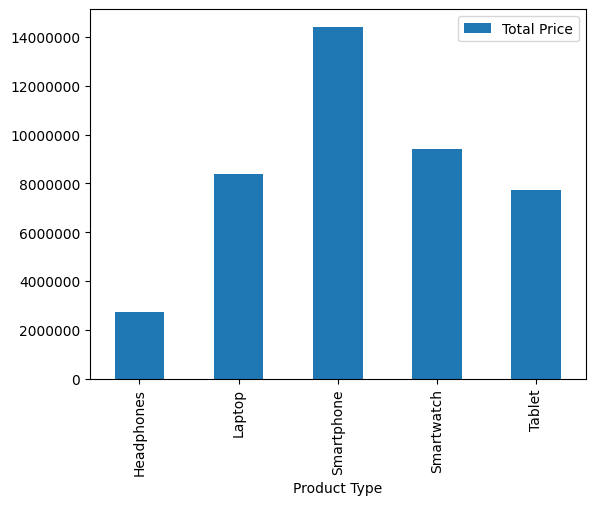

In [75]:
income_table_type.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [76]:
sales_table['Purchase month'] = pd.to_datetime(sales_table['Purchase Date']).dt.to_period('M')

income_table_add_month = sales_table.groupby('Purchase month').agg({
    'Add-on Total': 'sum',
})


income_table_add_month.head()


,Add-on Total
Purchase month,
2023-09,5337.61
2023-10,26153.21
2023-11,24453.33
2023-12,22750.23
2024-01,93254.95


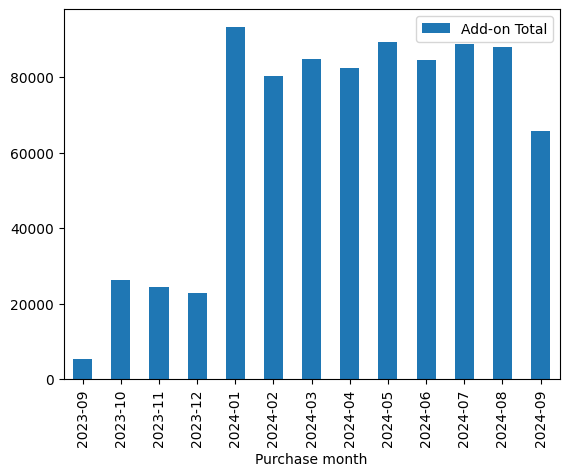

In [77]:
income_table_add_month.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [78]:
sales_table['Purchase qrt'] = pd.to_datetime(sales_table['Purchase Date']).dt.to_period('Q')

income_table_add_q = sales_table.groupby('Purchase qrt').agg({
    'Add-on Total': 'sum',
})

income_table_add_q.head()




,Add-on Total
Purchase qrt,
2023Q3,5337.61
2023Q4,73356.77
2024Q1,258222.60
2024Q2,256316.84
2024Q3,242361.42


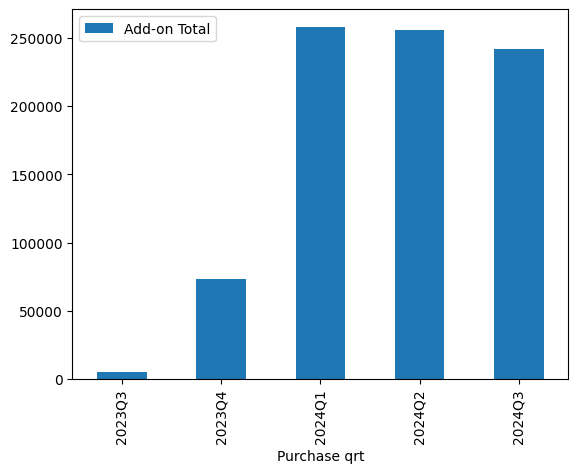

In [79]:
income_table_add_q.plot(kind='bar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()